# U-Net algorithm for image segmentation

It uses Pytorch

In [27]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.models.segmentation import deeplabv3_resnet50
from PIL import Image
import os
import glob

In [28]:
# Custom dataset class for segmentation
class CustomSegmentationDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = self._get_image_files()

    def _get_image_files(self):
        images = glob.glob(os.path.join(self.data_dir, "*.png"))
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image

transform.resize --> resizes the image to 256x256 pixels. Useful to feed an ANN.
transform.ToTensor() --> converts the image, which is originally in PIL (Python Imaging Library) format or NumPy format, into a PyTorch tensor. This is essential because PyTorch models typically expect input data in tensor format.

In [30]:
# Data transformations for segmentation
transform_seg = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

In [42]:
# List of subfolders containing the images
data_dirs = ["/content/drive/MyDrive/US dataset/Original without duplicated, misclassification and axila/benign"]


segmentation_datasets ans dataloader_seg are initialized as empty list and None, respectively, to store the segmentation datasets and the data loader for segmentation.

Within each iteration, it creates a CustomSegmentationDataset object with the specified data_dir and transform, and appends it to the segmentation_datasets list.

After all datasets have been loaded, the code uses torch.utils.data.ConcatDataset to concatenate all the segmentation datasets into a single dataset. It then creates a data loader dataloader_seg using the concatenated dataset, with a specified batch size of 4 and shuffle set to True.

 If the dataset loading was successful, the code proceeds to initialize the U-Net segmentation model using torchvision.models.segmentation.deeplabv3_resnet50 with a pretrained ResNet-50 backbone. It then sets up a training loop that iterates through the images in the subfolders.

In [44]:
# Load the dataset for segmentation
segmentation_datasets = []
dataloader_seg = None

try:
    for data_dir in data_dirs:
        segmentation_datasets.append(CustomSegmentationDataset(data_dir=data_dir, transform=transform_seg))
    dataloader_seg = DataLoader(torch.utils.data.ConcatDataset(segmentation_datasets), batch_size=4, shuffle=True)
except Exception as e:
    print(f"Error loading the segmentation dataset: {str(e)}")

if dataloader_seg is not None:
    # Training loop for U-Net segmentation
    try:
        model_unet = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=True)
        # Adjust and train the model for your specific use case

        # Iterate through the images in the subfolders
        for idx, image in enumerate(segmentation_datasets):
            # Perform segmentation or other processing on the image here
            print(f"Processing image {idx + 1} out of {len(segmentation_datasets)}")
    except Exception as e:
        print(f"Error while training the U-Net model: {str(e)}")

Processing image 1 out of 1


DeepLabV3+: DeepLab is a state-of-the-art deep learning model for semantic image segmentation, which involves labeling each pixel in an image with a corresponding class of what the pixel represents. DeepLabV3+ is an improved version of the DeepLabV3 model, which incorporates atrous convolution and a decoder module to capture object boundaries more accurately.
ResNet-50: ResNet, short for Residual Network, is a deep convolutional neural network architecture that has demonstrated outstanding performance in image classification tasks. ResNet-50 specifically refers to a ResNet architecture with 50 layers, which is a relatively deep network capable of learning intricate patterns and features from images.

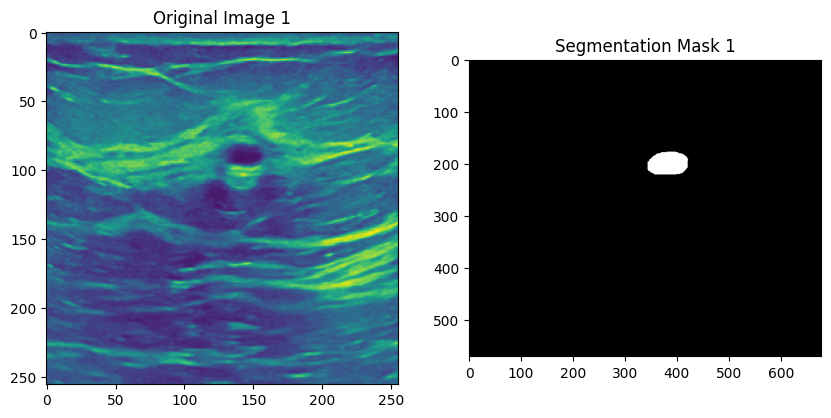

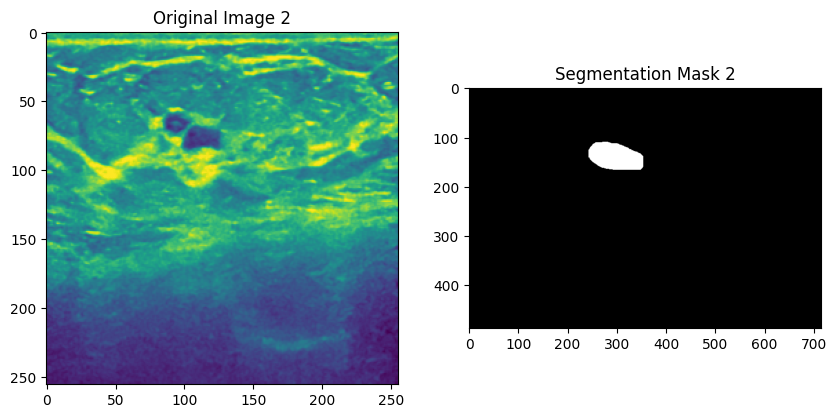

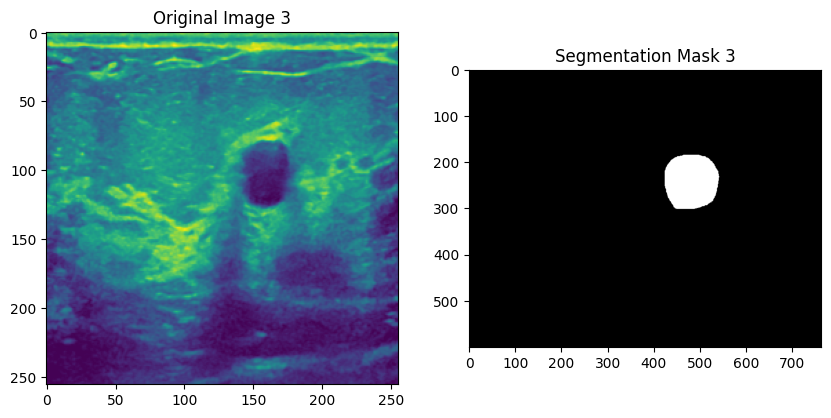

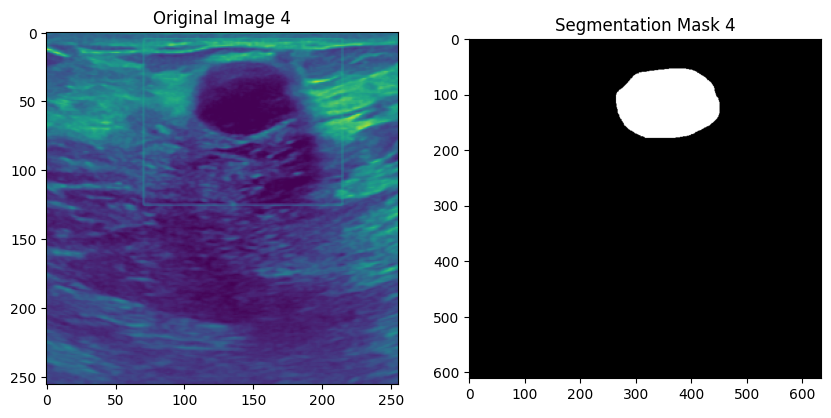

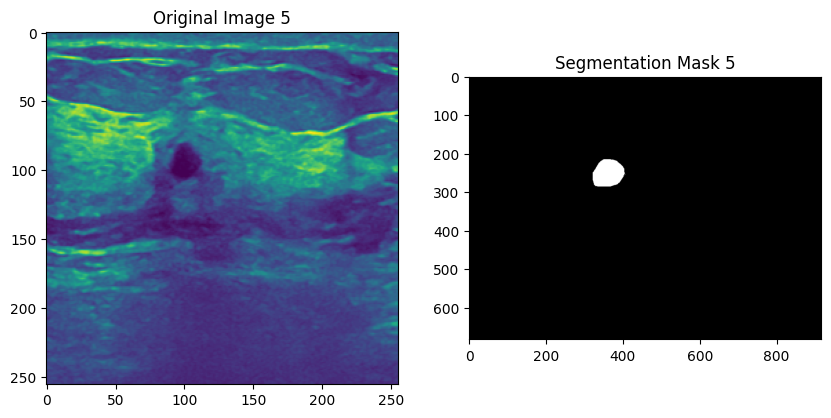

In [46]:
import os
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

# Visualize the original images and their segmentation masks
num_images_to_visualize = 5  # Adjust this based on your needs
for dataset in segmentation_datasets:
    for i in range(num_images_to_visualize):
        original_image = dataset[i][0]  # Access the first element (image) of the tuple

        # Obtain the corresponding segmentation mask
        image_path = dataset.images[i]
        mask_path = image_path.replace(".png", "_mask.png")
        if os.path.exists(mask_path):
            segmentation_mask = Image.open(mask_path)
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            axs[0].imshow(TF.to_pil_image(original_image))
            axs[0].set_title(f"Original Image {i+1}")
            axs[1].imshow(segmentation_mask)
            axs[1].set_title(f"Segmentation Mask {i+1}")
            plt.show()
        else:
            print(f"No segmentation mask found for image {i+1}")